<a href="https://colab.research.google.com/github/IImbryk/control_system_course/blob/main/LunarLander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка пакетов

In [1]:
%pip install ribs[all] gym~=0.17.0 Box2D~=2.3.10 tqdm

In [3]:
%%bash

# install required system dependencies
apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists...
Building dependency tree...
Reading state information...
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10

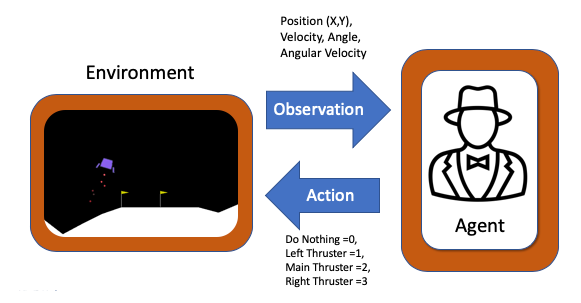

0 - ничего не делаем

1 - левый реактивный двигатель

2 - главный реактивный двигатель

3 - правый реактивный двигатель


## Импорт библиотек

In [13]:
import typing

import gym
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import random

In [5]:
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()


In [23]:

State = np.ndarray # обратная связь представлена как массив 
Action = int # управлябщее воздействие как целые числа

# регулятор 
Regulator = typing.Callable[[State], Action]


def random_regulator(state: State, number_actions: int) -> Action:
  """
  Алгоритм регулирования реализовать здесь
  """
  return random.randint(1, 3)


def make_random_regulator(number_actions: int) -> Regulator:
    return lambda state: random_regulator(state, number_actions)


def simulate(regulator: Regulator, env: gym.Env, ax: plt.Axes) -> None:
    state = env.reset()
    img = ax.imshow(env.render(mode='rgb_array'))
    done = False

    while not done:
        action = regulator(state)
        img.set_data(env.render(mode='rgb_array')) 
        ax.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)       
    env.close()
    
# Вызов модели из среды Gym
lunar_lander_v2 = gym.make('LunarLander-v2')
_ = lunar_lander_v2.seed(42)

# Обявление регулятора
random_agent = make_random_regulator(lunar_lander_v2.action_space.n)

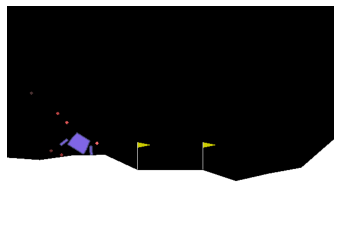

In [24]:
# Симуляция системы
_, ax = plt.subplots(1, 1)
simulate(random_agent, lunar_lander_v2, ax)